# Training LeNet on R-specific preprocessing

In [575]:
from utils import import_train_data
df, test_df = import_train_data()
df.sample(10)

,image_path,category,target,r
453,data/숫자인식/04/r_n04/4d_r_n04_03.jpg,number,4,True
1365,data/알파벳인식/D/r_D/4d_al_r_D_14.jpg,alphabet,D,True
2305,data/알파벳인식/M/r_M/4d_al_r_M_35.jpg,alphabet,M,True
993,data/숫자인식/09/r_n09/4d_r_n09_43.jpg,number,9,True
3726,data/자유패턴/128/128_g/128_g24.jpg,free_pattern,None,None
3537,data/알파벳인식/Z/Z/4d_al_Z_16.jpg,alphabet,Z,False
2562,data/알파벳인식/P/P/4d_al_P_42.jpg,alphabet,P,False
2274,data/알파벳인식/M/r_M/4d_al_r_M_03.jpg,alphabet,M,True
884,data/숫자인식/08/r_n08/4d_r_n08_35.jpg,number,8,True
3092,data/알파벳인식/U/r_U/4d_al_r_U_22.jpg,alphabet,U,True


In [13]:
df[df['target']==None]['target'] = 'free'

In [15]:
df.sample(10)

,image_path,category,target,r
185,data/숫자인식/01/r_n01/4d_r_n01_36.jpg,number,1,True
492,data/숫자인식/04/r_n04/4d_r_n04_43.jpg,number,4,True
1031,data/알파벳인식/A/A/4d_al_a_31.jpg,alphabet,A,False
3376,data/알파벳인식/X/r_X/4d_al_r_X_05.jpg,alphabet,X,True
149,data/숫자인식/01/n01/4d_n01_50.jpg,number,1,False
1772,data/알파벳인식/H/r_H/4d_al_r_H_11.jpg,alphabet,H,True
691,data/숫자인식/06/r_n06/4d_r_n06_42.jpg,number,6,True
902,data/숫자인식/09/n09/4d_n09_02.jpg,number,9,False
2495,data/알파벳인식/O/r_O/4d_al_r_O_25.jpg,alphabet,O,True
2971,data/알파벳인식/T/r_T/4d_al_r_T_17.jpg,alphabet,T,True


In [4]:
from preprocessing import preprocess
import matplotlib.pyplot as plt
import cv2

img = preprocess(df.iloc[100]['image_path'], img_size=(28, 28))
print(img)

[[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 

In [10]:
X_train = df.apply(lambda x: preprocess(x['image_path'], img_size=(28, 28), r=x['r']), axis=1)

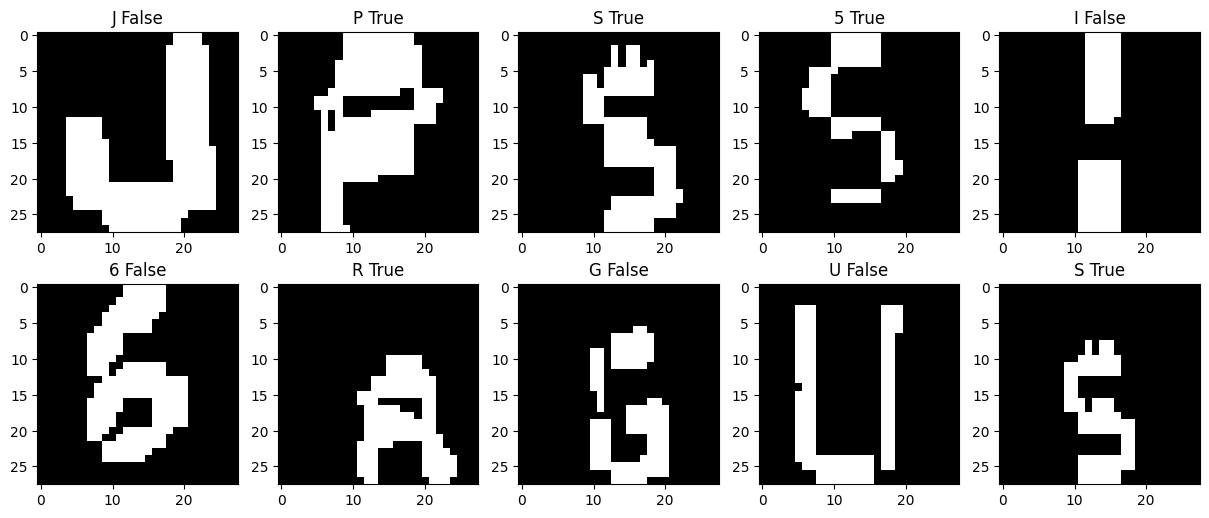

In [39]:
import random

random_indices = random.sample(range(len(X_train)), 10)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[random_indices[i]], cmap='gray')
    ax.set_title(df.iloc[random_indices[i]]['target'] + ' ' + str(df.iloc[random_indices[i]]['r']))
plt.show()

In [49]:
X_test = test_df.apply(lambda x: preprocess(x['image_path'], img_size=(28, 28), r=x['r']), axis=1)

In [50]:
import pandas as pd
import numpy as np

classes = [str(i) for i in range(10)] + [chr(i) for i in range(ord('A'), ord('Z') + 1)] + ['free']

y_train = df['target']
y_train = pd.get_dummies(y_train)
y_train = y_train[classes]

y_test = test_df['target']
y_test = pd.get_dummies(y_test)
y_test = y_test[classes]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3971,), (3971, 37), (1972,), (1972, 37))

In [51]:
from sklearn.model_selection import train_test_split

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42, stratify=y_test)
X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1577,), (1577, 37), (395,), (395, 37))

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(37, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [65]:
X_train_img = np.stack(X_train.values)
X_val_img = np.stack(X_val.values)
X_test_img = np.stack(X_test.values)

X_train_img.shape, X_val_img.shape, X_test_img.shape

((3971, 28, 28), (1577, 28, 28), (395, 28, 28))

In [66]:
model.fit(X_train_img, y_train, epochs=30, batch_size=128, validation_data=(X_val_img, y_val))

Epoch 1/30
32/32 [==============================] - 2s 21ms/step - loss: 3.3244 - accuracy: 0.1506 - val_loss: 2.7641 - val_accuracy: 0.3063
Epoch 2/30
32/32 [==============================] - 1s 18ms/step - loss: 2.1607 - accuracy: 0.4085 - val_loss: 2.1779 - val_accuracy: 0.4661
Epoch 3/30
32/32 [==============================] - 0s 15ms/step - loss: 1.4865 - accuracy: 0.5739 - val_loss: 1.6993 - val_accuracy: 0.5682
Epoch 4/30
32/32 [==============================] - 1s 16ms/step - loss: 1.1975 - accuracy: 0.6510 - val_loss: 1.5471 - val_accuracy: 0.6037
Epoch 5/30
32/32 [==============================] - 0s 15ms/step - loss: 0.9338 - accuracy: 0.7006 - val_loss: 1.4768 - val_accuracy: 0.6493
Epoch 6/30
32/32 [==============================] - 1s 16ms/step - loss: 0.8932 - accuracy: 0.7250 - val_loss: 1.2489 - val_accuracy: 0.6829
Epoch 7/30
32/32 [==============================] - 0s 16ms/step - loss: 0.7185 - accuracy: 0.7671 - val_loss: 1.2719 - val_accuracy: 0.6817
Epoch 8/30
32

50/50 [==============================] - 0s 3ms/step


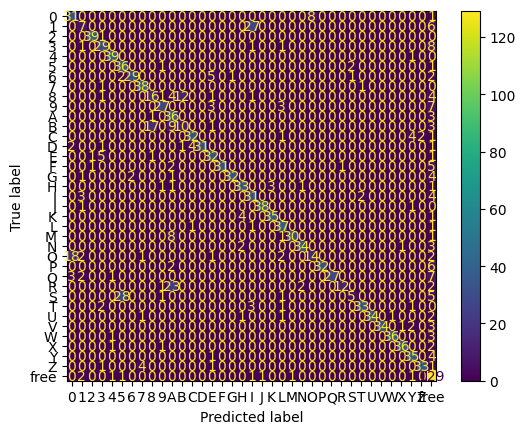

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_val_pred = model.predict(X_val_img)
X_val_pred = np.argmax(X_val_pred, axis=1)
y_val_true = np.argmax(y_val.values, axis=1)

cm = confusion_matrix(y_val_true, X_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

It's really good except for a few pairs. Let's see what they are.

In [74]:
misclassified_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i][j] > 5:
            misclassified_pairs.append((i, j))
misclassified_pairs.sort(key=lambda x: cm[x[0]][x[1]], reverse=True)
misclassified_pairs = [(classes[i], classes[j], cm[i][j]) for i, j in misclassified_pairs]
misclassified_pairs

[('S', '5', 28),
 ('1', 'I', 27),
 ('R', 'A', 23),
 ('O', '0', 18),
 ('B', '8', 17),
 ('8', 'B', 12),
 ('B', 'A', 9),
 ('0', 'O', 8),
 ('3', 'free', 8),
 ('M', 'A', 8),
 ('9', 'free', 7),
 ('Q', 'free', 7),
 ('1', 'free', 6),
 ('P', 'free', 6)]

S - 5, 1 - I, O - 0, B - 8 are nearly identical in seven segment so those can't really be helped.

Only M - A, R- A and B - A could be improved. Overclassifying letters and numbers as 'free' is probably due to the fact that 'free' class is overrepresented. We could try weight classes inversely proportional to their frequency in the training set.

In [83]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=classes, y=df['target'])
class_weights = dict(zip(range(len(classes)), class_weights))
class_weights

{0: 1.0732432432432433,
 1: 1.0732432432432433,
 2: 1.0732432432432433,
 3: 1.0732432432432433,
 4: 1.0732432432432433,
 5: 1.0732432432432433,
 6: 1.0732432432432433,
 7: 1.0732432432432433,
 8: 1.0732432432432433,
 9: 1.0626170725180626,
 10: 1.0732432432432433,
 11: 1.0732432432432433,
 12: 1.0732432432432433,
 13: 1.0732432432432433,
 14: 1.0732432432432433,
 15: 0.9756756756756757,
 16: 1.0732432432432433,
 17: 1.0732432432432433,
 18: 0.9756756756756757,
 19: 1.0732432432432433,
 20: 1.0732432432432433,
 21: 1.0732432432432433,
 22: 1.0732432432432433,
 23: 1.0732432432432433,
 24: 1.0732432432432433,
 25: 1.0732432432432433,
 26: 1.0732432432432433,
 27: 1.0732432432432433,
 28: 1.0732432432432433,
 29: 1.0732432432432433,
 30: 1.0732432432432433,
 31: 1.0732432432432433,
 32: 1.0732432432432433,
 33: 1.0732432432432433,
 34: 1.0732432432432433,
 35: 1.0732432432432433,
 36: 0.3066409266409266}

In [85]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(37, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_img, y_train, epochs=30, batch_size=128, validation_data=(X_val_img, y_val), class_weight=class_weights)

Epoch 1/30
32/32 [==============================] - 2s 21ms/step - loss: 3.3485 - accuracy: 0.1483 - val_loss: 2.8946 - val_accuracy: 0.2562
Epoch 2/30
32/32 [==============================] - 0s 15ms/step - loss: 2.0898 - accuracy: 0.3918 - val_loss: 1.9898 - val_accuracy: 0.4895
Epoch 3/30
32/32 [==============================] - 0s 16ms/step - loss: 1.3407 - accuracy: 0.6016 - val_loss: 1.6974 - val_accuracy: 0.5840
Epoch 4/30
32/32 [==============================] - 1s 16ms/step - loss: 1.0989 - accuracy: 0.6497 - val_loss: 1.5238 - val_accuracy: 0.6214
Epoch 5/30
32/32 [==============================] - 0s 16ms/step - loss: 0.9320 - accuracy: 0.7051 - val_loss: 1.4452 - val_accuracy: 0.6436
Epoch 6/30
32/32 [==============================] - 0s 15ms/step - loss: 0.8559 - accuracy: 0.7232 - val_loss: 1.3638 - val_accuracy: 0.6677
Epoch 7/30
32/32 [==============================] - 1s 16ms/step - loss: 0.7204 - accuracy: 0.7520 - val_loss: 1.3168 - val_accuracy: 0.6766
Epoch 8/30
32

50/50 [==============================] - 0s 4ms/step


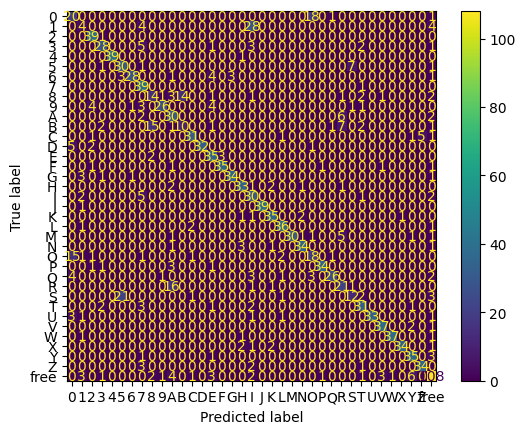

In [87]:
X_val_pred = model.predict(X_val_img)
X_val_pred = np.argmax(X_val_pred, axis=1)
y_val_true = np.argmax(y_val.values, axis=1)

cm = confusion_matrix(y_val_true, X_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

Now it doesn't predict free at all. It's probably worse now since we would choose alpha/num/free based on probability sums, so just use the original model.

## Pretraining on MNIST

In [114]:
X_train_mnist = np.load('binary-mnist/x_train.npy')
y_train_mnist = np.load('binary-mnist/y_train.npy')
X_test_mnist = np.load('binary-mnist/x_test.npy')
y_test_mnist = np.load('binary-mnist/y_test.npy')

X_train_mnist.shape, y_train_mnist.shape, X_test_mnist.shape, y_test_mnist.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [116]:
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1)

X_train_mnist.shape, y_train_mnist.shape, X_test_mnist.shape, y_test_mnist.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [126]:
y_train_mnist = pd.get_dummies(y_train_mnist)
y_test_mnist = pd.get_dummies(y_test_mnist)
y_train_mnist = y_train_mnist[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
y_test_mnist = y_test_mnist[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

y_train_mnist.shape, y_test_mnist.shape

((60000, 10), (10000, 10))

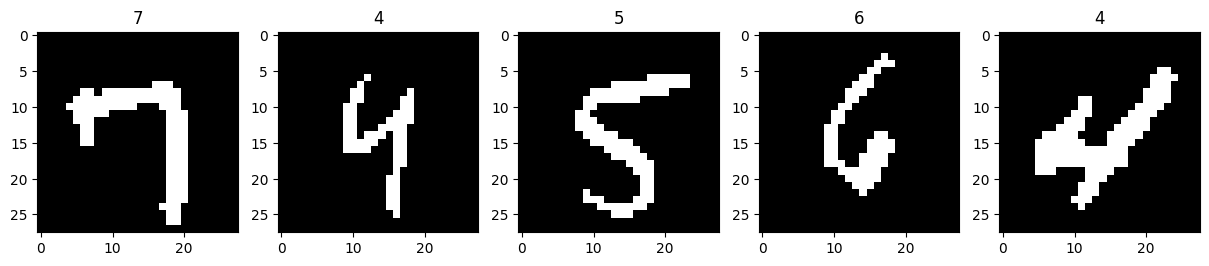

In [127]:
# check 5 random images
random_indices = random.sample(range(len(X_train_mnist)), 5)

fig, axes = plt.subplots(1, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_mnist[random_indices[i]], cmap='gray')
    ax.set_title(np.argmax(y_train_mnist.values[random_indices[i]]))
plt.show()

In [129]:
base_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

base_model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [130]:
base_model.fit(X_train_mnist, y_train_mnist, epochs=30, batch_size=128, validation_data=(X_test_mnist, y_test_mnist))

Epoch 1/30


2023-09-03 01:14:05.145687: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 94080000 exceeds 10% of free system memory.


469/469 [==============================] - 8s 14ms/step - loss: 0.3191 - accuracy: 0.9037 - val_loss: 0.0891 - val_accuracy: 0.9725
Epoch 2/30
469/469 [==============================] - 6s 14ms/step - loss: 0.0854 - accuracy: 0.9733 - val_loss: 0.0668 - val_accuracy: 0.9784
Epoch 3/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0534 - val_accuracy: 0.9826
Epoch 4/30
469/469 [==============================] - 7s 16ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0466 - val_accuracy: 0.9850
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0440 - val_accuracy: 0.9858
Epoch 6/30
469/469 [==============================] - 7s 14ms/step - loss: 0.0352 - accuracy: 0.9879 - val_loss: 0.0414 - val_accuracy: 0.9868
Epoch 7/30
469/469 [==============================] - 6s 14ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0482 - val_accuracy: 0.9852
Epoch 8/30

In [136]:
base_model.save('models/lenet-mnist.keras')

In [281]:
model = keras.models.load_model('models/lenet-mnist.keras')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 12, 12, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 120)             

In [286]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(37, activation='softmax')
])

for i, layer in enumerate(model.layers[:-1]):
    layer.set_weights(base_model.layers[i].get_weights())
    layer.trainable = False

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 12, 12, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_28 (Flatten)        (None, 256)               0         
                                                                 
 dense_87 (Dense)            (None, 120)             

In [287]:
model.fit(X_train_img, y_train, epochs=80, batch_size=128, validation_data=(X_val_img, y_val))

Epoch 1/80


32/32 [==============================] - 1s 12ms/step - loss: 5.1617 - accuracy: 0.0456 - val_loss: 4.2353 - val_accuracy: 0.0590
Epoch 2/80
32/32 [==============================] - 0s 9ms/step - loss: 3.7880 - accuracy: 0.0886 - val_loss: 3.3986 - val_accuracy: 0.1313
Epoch 3/80
32/32 [==============================] - 0s 7ms/step - loss: 3.1435 - accuracy: 0.1576 - val_loss: 2.9346 - val_accuracy: 0.2061
Epoch 4/80
32/32 [==============================] - 0s 7ms/step - loss: 2.7558 - accuracy: 0.2314 - val_loss: 2.6521 - val_accuracy: 0.2670
Epoch 5/80
32/32 [==============================] - 0s 7ms/step - loss: 2.5019 - accuracy: 0.2904 - val_loss: 2.4642 - val_accuracy: 0.3018
Epoch 6/80
32/32 [==============================] - 0s 7ms/step - loss: 2.3287 - accuracy: 0.3362 - val_loss: 2.3366 - val_accuracy: 0.3570
Epoch 7/80
32/32 [==============================] - 0s 7ms/step - loss: 2.1990 - accuracy: 0.3908 - val_loss: 2.2357 - val_accuracy: 0.3811
Epoch 8/80
32/32 [============

Fine tune it

In [288]:
model.layers[-2].trainable = True
model.layers[-3].trainable = True

model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_img, y_train, epochs=60, batch_size=128, validation_data=(X_val_img, y_val))

Epoch 1/60
32/32 [==============================] - 1s 13ms/step - loss: 1.0354 - accuracy: 0.7182 - val_loss: 1.5231 - val_accuracy: 0.5859
Epoch 2/60
32/32 [==============================] - 0s 8ms/step - loss: 0.9852 - accuracy: 0.7295 - val_loss: 1.5000 - val_accuracy: 0.5980
Epoch 3/60
32/32 [==============================] - 0s 8ms/step - loss: 0.9483 - accuracy: 0.7421 - val_loss: 1.4799 - val_accuracy: 0.6018
Epoch 4/60
32/32 [==============================] - 0s 8ms/step - loss: 0.9175 - accuracy: 0.7479 - val_loss: 1.4681 - val_accuracy: 0.6075
Epoch 5/60
32/32 [==============================] - 0s 10ms/step - loss: 0.8906 - accuracy: 0.7555 - val_loss: 1.4571 - val_accuracy: 0.6113
Epoch 6/60
32/32 [==============================] - 0s 8ms/step - loss: 0.8669 - accuracy: 0.7595 - val_loss: 1.4484 - val_accuracy: 0.6170
Epoch 7/60
32/32 [==============================] - 0s 8ms/step - loss: 0.8436 - accuracy: 0.7671 - val_loss: 1.4373 - val_accuracy: 0.6195
Epoch 8/60
32/32 [

In [289]:
model.save('models/lenet_os.keras')

13/13 [==============================] - 0s 3ms/step


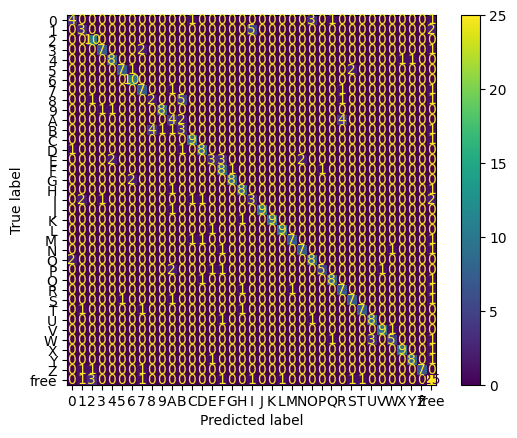

In [193]:
X_test_pred = model.predict(X_test_img)
X_test_pred = np.argmax(X_test_pred, axis=1)
y_test_true = np.argmax(y_test.values, axis=1)

cm = confusion_matrix(y_test_true, X_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

In [194]:
misclassified_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i][j] > 3:
            misclassified_pairs.append((i, j))
misclassified_pairs.sort(key=lambda x: cm[x[0]][x[1]], reverse=True)
misclassified_pairs = [(classes[i], classes[j], cm[i][j]) for i, j in misclassified_pairs]
misclassified_pairs

[('1', 'I', 5), ('8', 'B', 5), ('A', 'R', 4), ('B', '8', 4)]

It seems pretty good. Now add functionality for multi-tiered classification.

H


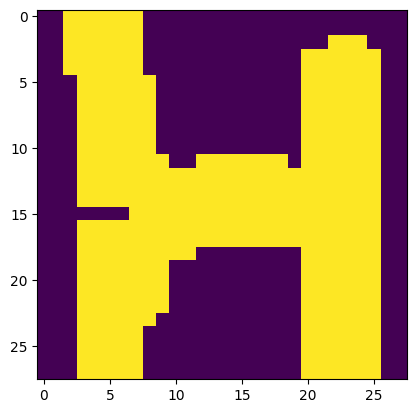

In [208]:
sample_x = X_val_img[5]
sample_y = y_val_true[5]

print(classes[sample_y])
plt.imshow(sample_x)

In [212]:
def predict_category(probabilities):
    num_pred = np.sum(pred[:10])
    char_pred = np.sum(pred[10:36])
    free_pred = pred[36]
    return np.argmax([num_pred, char_pred, free_pred])

pred = model.predict(sample_x.reshape(1, 28, 28, 1))[0]
predict_category(pred)

1/1 [==============================] - 0s 22ms/step


1

In [238]:
X_val_pred = model.predict(X_val_img)
X_val_pred.shape

50/50 [==============================] - 0s 3ms/step


(1577, 37)

In [262]:
def predict_category(predictions, sum=True):
    if not sum: 
        predicted_indices = np.argmax(predictions, axis=1)
        predicted_categories = np.where(predicted_indices < 10, 0, np.where(predicted_indices < 36, 1, 2))
    else:
        num_preds = np.sum(predictions[:, :10], axis=1)
        char_preds = np.sum(predictions[:, 10:36], axis=1)
        free_preds = predictions[:, 36]

        
        categories = {
            0: num_preds,
            1: char_preds,
            2: free_preds
        }
        
        # Find the category with the highest probability for each input
        predicted_categories = [max(categories, key=lambda key: categories[key][i]) for i in range(len(predictions))]
    
    return predicted_categories

X_preds_cat = predict_category(X_val_pred)
X_preds_cat[:10]

[1, 1, 0, 2, 0, 1, 1, 1, 1, 1]

In [240]:
y_val_cats = predict_category(y_val.values)
y_val_cats[:10]

[1, 1, 1, 1, 0, 1, 0, 1, 1, 2]

In [241]:
from sklearn.metrics import accuracy_score, log_loss
acc = accuracy_score(y_val_cats, preds)
acc

0.8091312618896639

In [242]:
y_val_cat_onehot = pd.get_dummies(y_val_cats)
y_val_cat_onehot = y_val_cat_onehot[[0, 1, 2]]
X_preds_cat_onehot = pd.get_dummies(X_preds_cat)
X_preds_cat_onehot = X_preds_cat_onehot[[0, 1, 2]]
y_val_cat_onehot.shape, X_preds_cat_onehot.shape

((1577, 3), (1577, 3))

In [243]:
logloss = log_loss(y_val_cat_onehot, X_preds_cat_onehot)
logloss

6.879606639267129

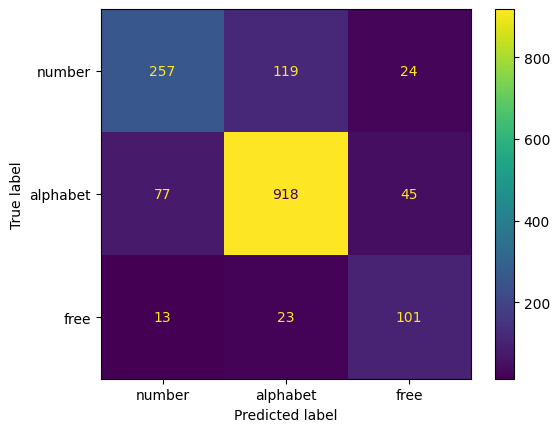

In [245]:
cm = confusion_matrix(y_val_cats, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['number', 'alphabet', 'free'])
disp.plot()

In [266]:
X_preds_cat_direct = predict_category(X_val_pred, sum=False)
X_preds_cat_direct[:10]

array([1, 1, 0, 2, 0, 1, 1, 1, 1, 1])

In [267]:
acc = accuracy_score(y_val_cats, X_preds_cat_direct)
acc

0.8040583386176284

In [268]:
X_preds_cat_direct_onehot = pd.get_dummies(X_preds_cat)
X_preds_cat_direct_onehot = X_preds_cat_onehot[[0, 1, 2]]

logloss = log_loss(y_val_cat_onehot, X_preds_cat_direct_onehot)
logloss

6.879606639267129

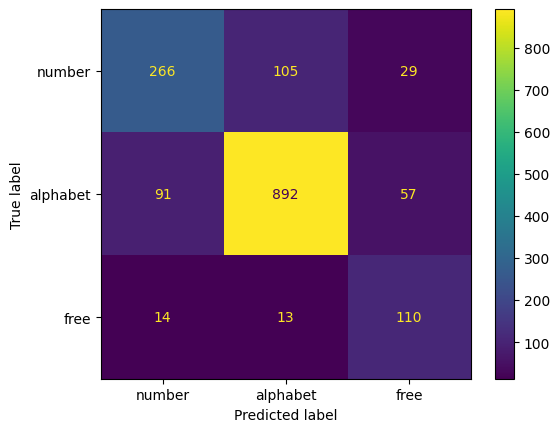

In [269]:
cm = confusion_matrix(y_val_cats, X_preds_cat_direct)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['number', 'alphabet', 'free'])
disp.plot()

Almost no difference but slightly better to calculate with sum it appears.

Try direct category classification.

In [279]:
y_train_cat = df['category']
y_train_cat = pd.get_dummies(y_train_cat)
y_train_cat = y_train_cat[['number', 'alphabet', 'free_pattern']]
y_train_cat.shape

(3971, 3)

In [520]:
base_model = keras.models.load_model('models/lenet-mnist.keras')

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(3, activation='softmax')
])

for i, layer in enumerate(model.layers[:-1]):
    layer.set_weights(base_model.layers[i].get_weights())
    layer.trainable = False

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 12, 12, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_30 (Flatten)        (None, 256)               0         
                                                                 
 dense_93 (Dense)            (None, 120)             

In [521]:
y_val_cat = pd.Series(y_val_cats)
y_val_cat = pd.get_dummies(y_val_cat)
y_val_cat = y_val_cat[[0, 1, 2]]
y_val_cat.shape

(1577, 3)

In [522]:
y_val_cat[:10]

,0,1,2
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,True,False,False
5,False,True,False
6,True,False,False
7,False,True,False
8,False,True,False
9,False,False,True


In [524]:
model.fit(X_train_img, y_train_cat, epochs=80, batch_size=128, validation_data=(X_val_img, y_val_cat))

Epoch 1/80


32/32 [==============================] - 1s 17ms/step - loss: 1.3414 - accuracy: 0.5298 - val_loss: 1.0454 - val_accuracy: 0.5764
Epoch 2/80
32/32 [==============================] - 0s 10ms/step - loss: 0.9946 - accuracy: 0.5993 - val_loss: 0.8879 - val_accuracy: 0.6151
Epoch 3/80
32/32 [==============================] - 0s 11ms/step - loss: 0.8935 - accuracy: 0.6288 - val_loss: 0.8129 - val_accuracy: 0.6430
Epoch 4/80
32/32 [==============================] - 0s 15ms/step - loss: 0.8352 - accuracy: 0.6467 - val_loss: 0.7673 - val_accuracy: 0.6569
Epoch 5/80
32/32 [==============================] - 0s 15ms/step - loss: 0.7980 - accuracy: 0.6545 - val_loss: 0.7414 - val_accuracy: 0.6601
Epoch 6/80
32/32 [==============================] - 0s 11ms/step - loss: 0.7757 - accuracy: 0.6545 - val_loss: 0.7254 - val_accuracy: 0.6646
Epoch 7/80
32/32 [==============================] - 0s 11ms/step - loss: 0.7564 - accuracy: 0.6573 - val_loss: 0.7120 - val_accuracy: 0.6753
Epoch 8/80
32/32 [======

In [525]:
model.layers[-2].trainable = True
model.layers[-3].trainable = True

model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_img, y_train_cat, epochs=30, batch_size=128, validation_data=(X_val_img, y_val_cat))

Epoch 1/30
32/32 [==============================] - 1s 19ms/step - loss: 0.5543 - accuracy: 0.7751 - val_loss: 0.5732 - val_accuracy: 0.7666
Epoch 2/30
32/32 [==============================] - 0s 11ms/step - loss: 0.5309 - accuracy: 0.7852 - val_loss: 0.5597 - val_accuracy: 0.7724
Epoch 3/30
32/32 [==============================] - 0s 10ms/step - loss: 0.5129 - accuracy: 0.7933 - val_loss: 0.5491 - val_accuracy: 0.7762
Epoch 4/30
32/32 [==============================] - 0s 10ms/step - loss: 0.4972 - accuracy: 0.8018 - val_loss: 0.5422 - val_accuracy: 0.7819
Epoch 5/30
32/32 [==============================] - 0s 10ms/step - loss: 0.4831 - accuracy: 0.8068 - val_loss: 0.5345 - val_accuracy: 0.7850
Epoch 6/30
32/32 [==============================] - 0s 11ms/step - loss: 0.4698 - accuracy: 0.8142 - val_loss: 0.5282 - val_accuracy: 0.7895
Epoch 7/30
32/32 [==============================] - 0s 10ms/step - loss: 0.4578 - accuracy: 0.8164 - val_loss: 0.5207 - val_accuracy: 0.7895
Epoch 8/30
32

In [526]:
model.save('models/lenet_cat.keras')

It's slightly better, 83% vs 81% accuracy. First try 81% model.

Now try to find guess r given an image.

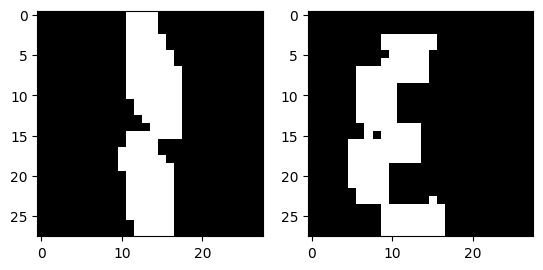

In [533]:
image = df['image_path'].iloc[100]
main = preprocess(image, img_size=(28, 28), r=False)
gray = preprocess(image, img_size=(28, 28), r=True)
plt.subplot(1, 2, 1)
plt.imshow(main, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')

Ha.. even as a human, there is no way to know if this is E, 1, or I. The patterns are exactly the same. We can expect this to be wrong most of the time.

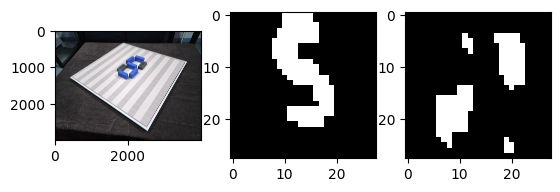

In [534]:
image = df['image_path'].iloc[500]
main = preprocess(image, img_size=(28, 28), r=False)
gray = preprocess(image, img_size=(28, 28), r=True)
plt.subplot(1, 3, 1)
plt.imshow(cv2.imread(image))
plt.subplot(1, 3, 2)
plt.imshow(main, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(gray, cmap='gray')

This one is either a 5 or an S. It shouldn't be able to classify the category well, but the R is definitely false. How can we determine that..

In [535]:
model = keras.models.load_model('models/lenet_os.keras')
main_pred = model.predict(main.reshape(1, 28, 28, 1))[0]
main_pred

1/1 [==============================] - 0s 175ms/step


array([8.82908818e-13, 1.01199821e-05, 1.49676353e-07, 1.20349854e-04,
       5.94184827e-03, 8.87305260e-01, 2.12192219e-02, 5.90151084e-09,
       4.25455028e-06, 6.19603670e-04, 7.97964094e-06, 4.93053767e-06,
       3.31723768e-08, 4.66379824e-09, 4.04916820e-04, 1.43894313e-05,
       1.00724455e-05, 3.43636493e-05, 4.99536100e-06, 4.70270350e-11,
       1.81338162e-08, 6.31398267e-09, 1.39639939e-10, 1.72016044e-07,
       2.94920505e-10, 4.16515877e-10, 2.34510056e-09, 2.42108890e-05,
       8.37835446e-02, 4.93246625e-06, 1.71597563e-11, 6.19882867e-10,
       1.08954370e-13, 2.17762008e-07, 4.75963810e-04, 9.20450560e-09,
       8.39925451e-06], dtype=float32)

In [324]:
gray_pred = model.predict(gray.reshape(1, 28, 28, 1))[0]
gray_pred

1/1 [==============================] - 0s 19ms/step


array([2.6300084e-03, 1.2883607e-05, 8.1960589e-01, 1.5935916e-09,
       1.2748715e-10, 3.5806203e-16, 3.0662285e-11, 7.6060966e-03,
       5.1456100e-05, 9.9322550e-10, 1.1849037e-03, 2.6730152e-03,
       8.0354852e-07, 6.8185254e-06, 2.2924754e-05, 2.4597050e-06,
       3.2994262e-13, 1.5540292e-06, 1.0991694e-06, 2.5193398e-03,
       1.5374054e-12, 3.4697261e-04, 2.7017915e-03, 3.0125263e-10,
       1.0803801e-02, 3.2656561e-03, 1.0356817e-03, 6.4647870e-06,
       1.7552295e-16, 1.1467811e-06, 7.8606590e-06, 1.3195549e-05,
       1.1253835e-06, 3.1777182e-11, 1.7037382e-07, 1.3936101e-04,
       1.4535761e-01], dtype=float32)

In [327]:
print(np.argmax(main_pred[:36]))
print(main_pred[np.argmax(main_pred[:36])])
print(np.argmax(gray_pred[:36]))
print(gray_pred[np.argmax(gray_pred[:36])])

5
0.88730526
2
0.8196059


We can then get a guess for R and guess the result.. but if both values for 'free' are high we should select that.

In [328]:
def predict_r(main, gray):
    main_pred = model.predict(main.reshape(1, 28, 28, 1))[0]
    gray_pred = model.predict(gray.reshape(1, 28, 28, 1))[0]
    
    main_pred_idx = np.argmax(main_pred[:36])
    gray_pred_idx = np.argmax(gray_pred[:36])
    
    if main_pred[main_pred_idx] > gray_pred[gray_pred_idx]:
        return False
    else:
        return True

predict_r(main, gray)

1/1 [==============================] - 0s 18ms/step


False

Try some more and see if this is accurate at all.

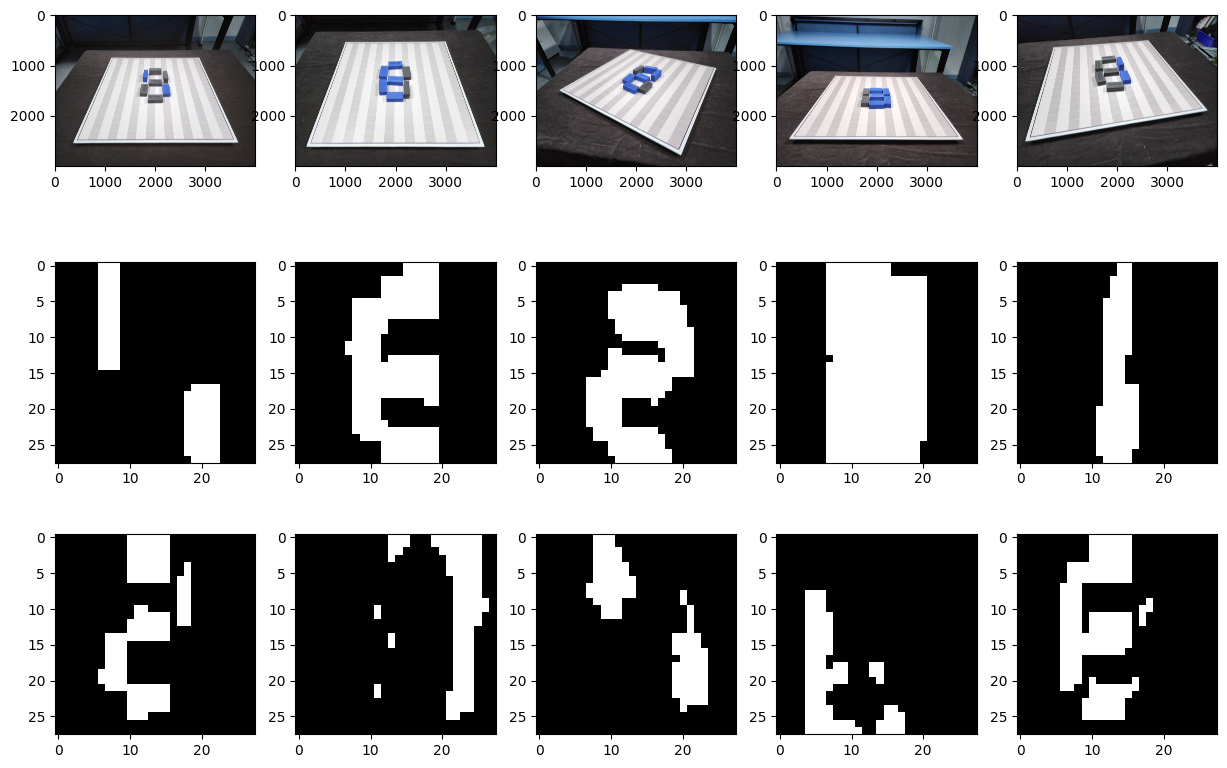

In [398]:
random_indices = np.random.randint(0, len(X_test), 5)
images = df['image_path'].iloc[random_indices].apply(lambda x: cv2.imread(x))
main = df['image_path'].iloc[random_indices].apply(lambda x: preprocess(x, img_size=(28, 28), r=False))
gray = df['image_path'].iloc[random_indices].apply(lambda x: preprocess(x, img_size=(28, 28), r=True))

fig, ax = plt.subplots(3, 5, figsize=(15, 10))
for i in range(5):
    ax[0][i].imshow(images.iloc[i])
    ax[1][i].imshow(main.iloc[i], cmap='gray')
    ax[2][i].imshow(gray.iloc[i], cmap='gray')
plt.show()

Three correct, one wrong, one possible..

Let's try at larger scale.

In [400]:
def predict_r(main, gray):
    main_pred_prob = main_pred[:, :36].max(axis=1)
    gray_pred_prob = gray_pred[:, :36].max(axis=1)

    result = np.where((main_pred[:, 36] > 0.5) & (gray_pred[:, 36] > 0.5), None, 
              np.where(main_pred_prob < gray_pred_prob, True, False))

    return result

main_pred = model.predict(np.stack(main.values).reshape(-1, 28, 28, 1))
gray_pred = model.predict(np.stack(gray.values).reshape(-1, 28, 28, 1))
main_pred.shape, gray_pred.shape

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 22ms/step


((5, 37), (5, 37))

In [401]:
predict_r(main_pred, gray_pred)

array([True, False, False, True, True], dtype=object)

In [402]:
df.iloc[random_indices]['r']

261     True
170     True
213    False
333    False
114    False
Name: r, dtype: object

In [404]:
random_indices = np.random.randint(0, len(X_train), 100)
main = df['image_path'].iloc[random_indices].apply(lambda x: preprocess(x, img_size=(28, 28), r=False))
gray = df['image_path'].iloc[random_indices].apply(lambda x: preprocess(x, img_size=(28, 28), r=True))
main_pred = model.predict(np.stack(main.values).reshape(-1, 28, 28, 1))
gray_pred = model.predict(np.stack(gray.values).reshape(-1, 28, 28, 1))

preds = predict_r(main_pred, gray_pred)
true = df.iloc[random_indices]['r']
true = np.stack(true.values)


preds.shape, true.shape

4/4 [==============================] - 0s 3ms/step


((100,), (100,))

In [406]:
true = np.stack(true.values)
print(preds[:10])
print(true[:10])

[True False False True False False None True False False]
[True False False True False True None True False False]


In [407]:
acc = np.sum(preds == true) / len(preds)
acc

0.79

Hmmm, not that bad.

Clean it up with the full prediction pipeline and try it on the validation set.

In [410]:
rand_idx = np.random.randint(0, len(df))
rand_idx

339

In [536]:
rand_x = df['image_path'].iloc[rand_idx]
rand_y = df['target'].iloc[rand_idx]

rand_x_main = preprocess(rand_x, img_size=(28, 28), r=False)
rand_x_gray = preprocess(rand_x, img_size=(28, 28), r=True)

rand_x_main_pred = model.predict(rand_x_main.reshape(1, 28, 28, 1))[0]
rand_x_gray_pred = model.predict(rand_x_gray.reshape(1, 28, 28, 1))[0]

rand_x_main_pred

1/1 [==============================] - 0s 25ms/step


array([6.15859707e-12, 1.29436041e-04, 1.41578676e-05, 9.89118338e-01,
       2.58555758e-07, 3.93836934e-04, 9.26496546e-10, 3.80097330e-03,
       8.24470771e-06, 5.89446723e-03, 1.61604831e-07, 7.50723484e-06,
       9.80586432e-16, 8.18771451e-09, 2.14723617e-09, 6.13490292e-12,
       1.09635784e-13, 4.91850516e-09, 2.43406848e-05, 2.46255230e-08,
       4.09728678e-08, 2.00858861e-12, 1.09201797e-11, 8.40030420e-16,
       6.56620136e-09, 1.39910272e-09, 1.10325526e-09, 3.90344979e-07,
       8.28626435e-06, 2.89130764e-09, 1.66072212e-12, 1.17969773e-10,
       4.60255045e-15, 3.27060644e-12, 3.60842678e-04, 6.21318961e-08,
       2.38556808e-04], dtype=float32)

In [537]:
rand_x_main_pred_prob = rand_x_main_pred[:36].max()
rand_x_gray_pred_prob = rand_x_gray_pred[:36].max()
print(rand_x_main_pred[36])
print(rand_x_gray_pred[36])

0.00023855681
0.9079791


In [538]:
pred_idx = np.argmax(rand_x_main_pred[:36])
pred_idx

3

In [539]:
# category: number, pred = 4
rand_y

'3'

In [543]:
def get_category(pred):
    return 0 if pred < 10 else (1 if pred < 36 else 2)

def infer(X, return_r=False):
    main = preprocess(X, img_size=(28, 28), r=False)
    gray = preprocess(X, img_size=(28, 28), r=True)

    main_pred = model.predict(main.reshape(1, 28, 28, 1), verbose=0)[0]
    gray_pred = model.predict(gray.reshape(1, 28, 28, 1), verbose=0)[0]

    if main_pred[36] > 0.5 and gray_pred[36] > 0.5:
        return (36, None) if return_r else 2
    
    main_pred_idx = np.argmax(main_pred[:36])
    gray_pred_idx = np.argmax(gray_pred[:36])

    if main_pred[main_pred_idx] > gray_pred[gray_pred_idx]:
        return (main_pred_idx, False) if return_r else main_pred_idx
    else:
        return (gray_pred_idx, True) if return_r else gray_pred_idx

infer(rand_x)

3

In [544]:
X_test = test_df['image_path']
y_test = test_df[['category', 'target', 'r']]

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42, stratify=y_test)
X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1577,), (1577, 3), (395,), (395, 3))

In [546]:
categories = ["number", "alphabet", "free_pattern"]

target_preds = []
cat_preds = []
r_preds = []
for x in X_test:
    pred, r = infer(x, return_r=True)
    target_preds.append(classes[pred])
    cat_preds.append(categories[get_category(pred)])
    r_preds.append(r)

target_preds = np.array(target_preds, dtype=object)
cat_preds = np.array(cat_preds, dtype=object)
r_preds = np.array(r_preds, dtype=object)

In [547]:
np.unique(cat_preds, return_counts=True)

(array(['alphabet', 'free_pattern', 'number'], dtype=object),
 array([269,  19, 107]))

In [548]:
target_preds[:5]

array(['R', '3', '3', '3', 'U'], dtype=object)

In [549]:
y_test_target = y_test['target'].values
y_test_target[:5]

array(['R', '3', '3', '3', 'U'], dtype=object)

In [550]:
target_acc = np.sum(target_preds == y_test_target) / len(target_preds)
target_acc

0.6177215189873417

In [579]:
y_test.loc[y_test['category'] == 'free_pattern', 'r'] = None
y_test_r = y_test['r'].values
y_test_r[:5]

array([True, False, False, True, False], dtype=object)

In [552]:
r_acc = np.sum(r_preds == y_test_r) / len(r_preds)
r_acc

0.7443037974683544

In [553]:
y_test_cat[:5]

array(['alphabet', 'number', 'number', 'number', 'alphabet'], dtype=object)

In [554]:
cat_preds[:5]

array(['alphabet', 'number', 'number', 'number', 'alphabet'], dtype=object)

In [555]:
y_test_cat = y_test['category'].values
cat_preds = np.array(cat_preds, dtype=object)
cat_acc = np.sum(cat_preds == y_test_cat) / len(cat_preds)
cat_acc

0.7949367088607595

In [556]:
y_test_target[:5]

array(['R', '3', '3', '3', 'U'], dtype=object)

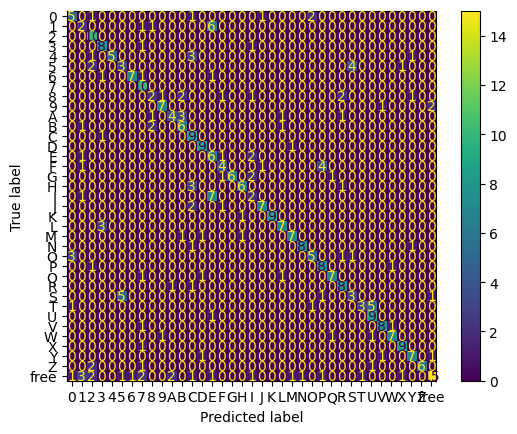

In [563]:
target_cm = confusion_matrix(y_test_target, target_preds, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=target_cm, display_labels=classes)
disp.plot()

In [558]:
np.unique(cat_preds)

array(['alphabet', 'free_pattern', 'number'], dtype=object)

In [559]:
np.unique(y_test_cat)

array(['alphabet', 'free_pattern', 'number'], dtype=object)

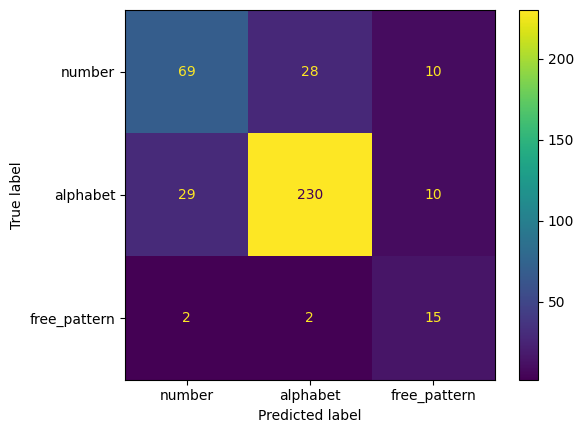

In [562]:
cat_cm = confusion_matrix(cat_preds, y_test_cat, labels=categories)
disp = ConfusionMatrixDisplay(confusion_matrix=cat_cm, display_labels=categories)
disp.plot()

In [565]:
r_preds[:50]

array([True, False, False, True, False, True, True, True, False, False,
       True, True, False, False, True, False, False, True, True, True,
       False, False, False, False, True, False, None, True, True, None,
       False, False, True, True, True, False, True, True, False, True,
       False, False, True, True, True, None, False, False, True, None],
      dtype=object)

In [581]:
y_test_r[:50]

array([True, False, False, True, False, True, False, True, False, None,
       True, True, False, False, True, True, False, True, True, True,
       False, False, False, False, True, False, None, True, True, None,
       False, False, True, True, False, True, None, True, False, True,
       False, False, True, False, True, None, False, False, True, None],
      dtype=object)

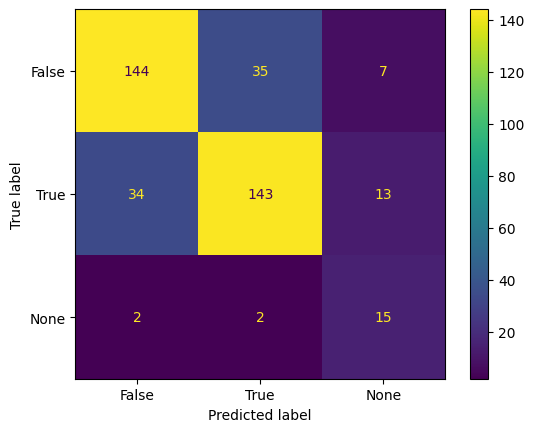

In [582]:
label_mapping = {
    False: 0,
    True: 1,
    None: 2
}

y_test_r_numeric = [label_mapping[r] for r in y_test_r]
r_preds_numeric = [label_mapping[r] for r in r_preds]

r_cm = confusion_matrix(r_preds_numeric, y_test_r_numeric, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=r_cm, display_labels=['False', 'True', 'None'])
disp.plot()